# A simple NN classifier
## The most basic tensorflow example
------
Code used: [Basic classification](https://www.tensorflow.org/tutorials/keras/classification)

## Step 0: Imports and initialization

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Our dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image above contains a 28 by 28 2D array of values between 0 and 255. The labels arrays contain a number representing a different category of clothing.

In [4]:
# For easier labeling, initalize the category names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

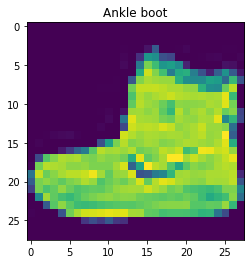

In [5]:
# An example image
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]]);

In [6]:
# Pre-process the data by scaling it [0, 255] => [0, 1]
# Question: What happens if we don't?
train_images = train_images/255.0
test_images = test_images/255.0

## Step 1: Building the model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Question: Why do we need to flatten?
    keras.layers.Dense(128, activation='relu'), # Experiment with different activation functions!
    keras.layers.Dense(10)
])

`keras.Sequential` describes the model as as series of operations starting with the first array element. For our purposes, we'll use the following CNN model:
1. Flatten: This layer transforms our 28x28 image into a single vector of length 28\*28=784.
2. Neural layer: This layer contains `128` neurons. It learns how to classify the image. 
3. Output layer: This layer contains 10 neurons to activate with one corresponding to each possible category.

Note that the `dense` keyword for the last two layers mean that they are *densely connected* to each other (that is, they are fully connected). 

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We need to compile the model before we can use it. This method requires a loss function to be specified at the minimum, but we can also set other parameters as above. Above are the recommended parameters as provided by the TF tutorial, but feel free to experiment with others. 

## Step 2: Training the model

In [9]:
model.fit(train_images, train_labels, epochs=10);

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4984 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3760 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3355 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3096 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2933 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2785 - accuracy: 0.8976
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2659 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2569 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2462 - accuracy: 0.9078
Epoch

Pretty self-explanatory: given a training set and training labels, fit the model to the data. Defaults to 1 epoch (which obviously is not very accurate at all).

## Step 3: Testing the model

Keras includes the very handy `model.evaluate` method for testing the trained model against a test set. 

In [10]:
# The verbose=2 parameter squelches other ouput other than loss and accuracy.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 1s - loss: 0.2528 - accuracy: 0.8760


The model has a test accuracy that is lower than the training score, suggesting overfitting. 

In the future, we might consider adding a regularization parameter using the `kernel_regularizer` while building our model layers. Adding dropout to the model is also a valid approach to minimizing overfitting here. We can do this by adding a dropout layer before the output with `layers.Dropout(0.5)`.

Of course, combining *both* approaches would usually lead to the best results, and Keras makes it easy to iteratively build our model!

## Step 4: Using the model

In [11]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

Simply call `model.predict` to get predictions. This method will return the results of the ouput layer (i.e. a list of porbabilities), so we call `np.argmax` to get the most likely one. 

Note that `keras` optimizes for *batch prediction*; `model.predict` expects and uses a **list of inputs** not a single data point.

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([4.5213996e-10, 8.5948254e-12, 1.3900605e-11, 5.8819807e-12,
       3.8728057e-10, 4.3336307e-03, 1.0762592e-08, 4.9579889e-03,
       1.8381929e-08, 9.9070835e-01], dtype=float32)

It's good practice to apply a final Softmax layer to scale the probabilities between 0 and 1. Calling `argmax` on the results will net the same output as not having the layer (but we don't add it onto our trained model as it messes with the outputs).

In [15]:
np.argmax(predictions[0])

9

Try out some of the test images below!

In [16]:
from ipywidgets.widgets import interact

@interact(image='1')
def predict_and_display(image):
    try:
        i = int(image)
        plt.imshow(test_images[i])
        plt.title(f'This is a {class_names[np.argmax(predictions[i])]}')
        plt.xlabel(f'Actually a {class_names[test_labels[i]]}')
        print('Probabilities\n'+'-'*22)
        for j in range(len(class_names)):
            print(f'{class_names[j]:<12}{str(round(predictions[i][j], 4)):>10}')
    except ValueError:
        return

interactive(children=(Text(value='1', description='image'), Output()), _dom_classes=('widget-interact',))